# K-Means Clustering

## Importing the Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

## Importing the Dataset

- The first column (customer ID) is excluded as it doesn't provide any relevant data
- All the other column would be used
  
> Column 3 and 4 are the only ones so that a 2D graph can be plotted at the end, in the real world it should have been from the second column (index 1)

In [13]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the Elbow Method to Find the Optimal Number of Clusters

### Elbow Method

- Used to find the optimal number of clusters (K).
- Plot the sum of squared distances (inertia) from each point to its centroid.
- Look for the "elbow" point where the reduction in inertia slows down.

#### Formula for Inertia

\[ \text{Inertia} = \sum_{i=1}^{n} \min_{j \in \{1, \ldots, K\}} (|| x_i - \mu_j ||^2) \]

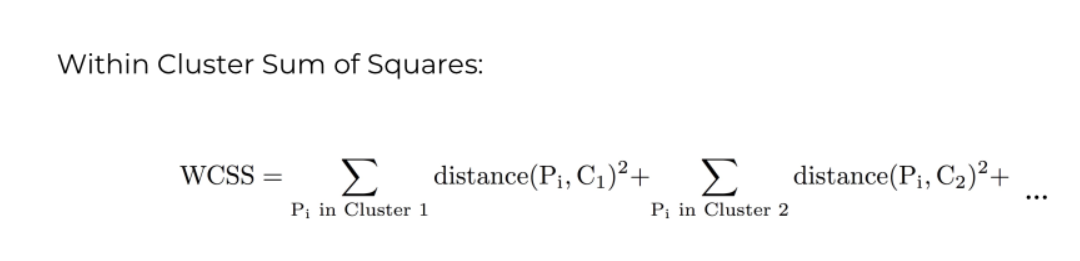

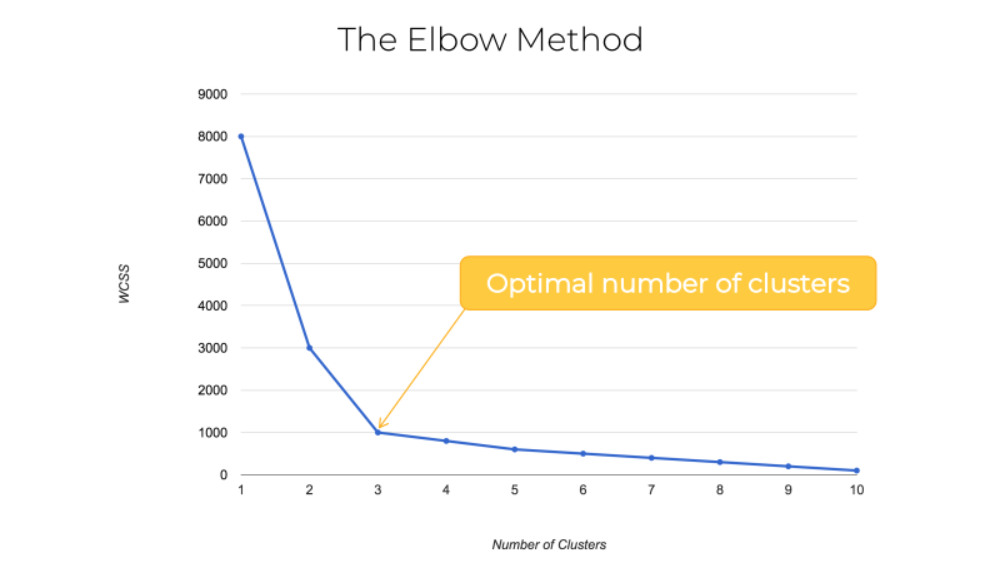

- The K-Means algorithm is ran first to decide the number of clusters (similar to trial and error)
- This is then used to decide the optimal number of clusters hence the K-Means algorithm is re-ran separately with the number of clusters that have been decided

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

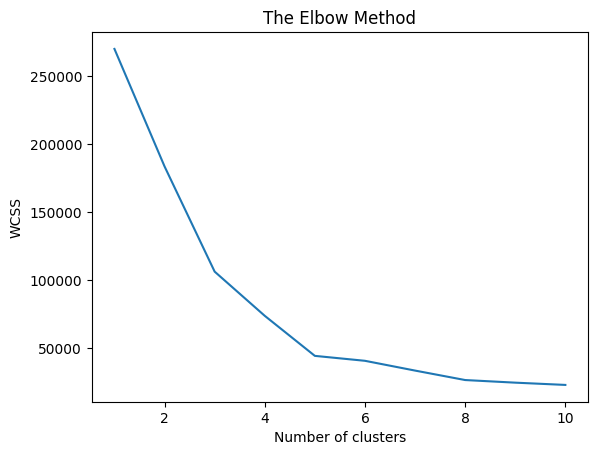

In [15]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- 5 appears to be the optimal number of clusters
- This will be used to train the K-Means again later

## Training the K-Means Model on the Dataset

### What is K-Means?

- K-Means is a clustering algorithm.
- It groups data points into K clusters.
- Each data point belongs to the cluster with the nearest mean.

### How the Basic Algorithm Works

1. **Initialization**: Select K initial centroids randomly.
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Calculate new centroids as the mean of the assigned data points.
4. **Repeat**: Repeat the assignment and update steps until centroids do not change.

### K-Means++

- Improvement of the basic K-Means.
- Provides a smarter way to initialize centroids.
- Helps to avoid poor clustering results.

### Why K-Means++ is Used

- Reduces the chances of ending up in a local minimum (random initialisation trap).
- Provides better starting points for the algorithm.

### How K-Means++ Works

1. **First Centroid**: Choose the first centroid randomly.
2. **Next Centroids**: For each data point, compute the distance to the nearest centroid already chosen.
3. **Probability Distribution**: Choose the next centroid from the data points with probability proportional to the square of the distance.
4. **Repeat**: Continue until K centroids are chosen.
5. **Proceed with K-Means**: Use these centroids as the initial centroids for the standard K-Means algorithm.

### Differences from Standard K-Means

- **Initialization**: K-Means++ uses a probabilistic method for better initial centroids.
- **Efficiency**: Generally leads to better and faster convergence.
- **Results**: Produces more accurate clustering results.

In [16]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(X)

In [17]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


First customer belongs to cluster 4

## Visualising the Clusters

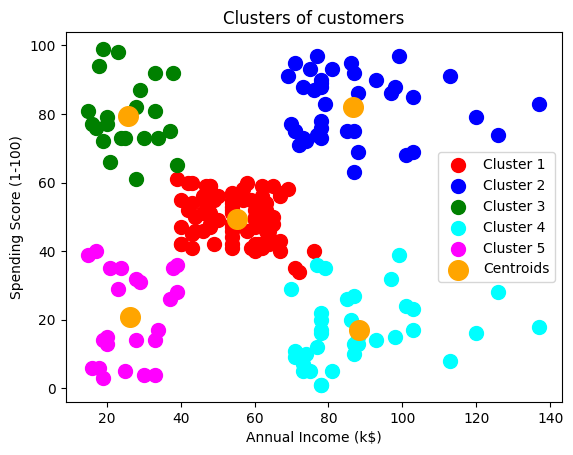

In [18]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'orange', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()